In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None 

aisle=pd.read_csv('/home/pirl/test/4조_Grocery/grocery-aisles.csv')
department=pd.read_csv('/home/pirl/test/4조_Grocery/grocery-departments.csv')
order_product_prior=pd.read_csv('/home/pirl/test/4조_Grocery/grocery-order_products__prior.csv')
order_product_train=pd.read_csv('/home/pirl/test/4조_Grocery/grocery-order_products__train.csv')
order=pd.read_csv('/home/pirl/test/4조_Grocery/grocery-orders.csv')
product=pd.read_csv('/home/pirl/test/4조_Grocery/grocery-products.csv')

print('aisle 결측치 \n', aisle.isnull().sum())
print('department 결측치 \n', department.isnull().sum())
print('order_product_prior 결측치 \n', order_product_prior.isnull().sum())
print('order_product_train 결측치 \n', order_product_train.isnull().sum())
print('order 결측치 \n', order.isnull().sum())
print('product 결측치 \n', product.isnull().sum())

#days_since_prior_order 결측치    206229



aisle 결측치 
 aisle_id    0
aisle       0
dtype: int64
department 결측치 
 department_id    0
department       0
dtype: int64
order_product_prior 결측치 
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_product_train 결측치 
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order 결측치 
 order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206229
dtype: int64
product 결측치 
 product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [2]:
df_test=order[order['eval_set']=='test']
df_test.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [ ]:
df_test

In [30]:
#train의 숫자가 맞지않는 값이 총 24개
import pandas as pd

df_orders = order

def check_train_order_number(orders):
    print('마지막 주문번호 확인 시작')

    id_num = max(orders['user_id'])

    cnt = []
    user_id_eval = []
    for i in range(1, id_num+1):
        user_id_eval = orders[orders['user_id'] == i]['eval_set'].tolist()
        if 'test' in user_id_eval:
            pass
            # print('test 데이터로 제외')
        elif 'train' in user_id_eval:
            train_order_number = float(orders[orders['user_id'] == i][orders['eval_set'] == 'train'].order_number)
            priorMax_order_number = float(max(orders[orders['user_id'] == i][orders['eval_set'] == 'prior'].order_number))
 
            if train_order_number == priorMax_order_number+1:
                pass
                # print('correct case : user_id = %s, train_order_number = %s, priorMax_order_number = %s' %(i, train_order_number, priorMax_order_number))
            else:
                print('wrong case : user_id = %s, train_order_number = %s, priorMax_order_number = %s' %(i, train_order_number, priorMax_order_number))
                orders.loc[(orders.user_id == i) & (orders.eval_set == 'train'), 'days_since_prior_order'] = priorMax_order_number + 1
                cnt.append(i)

    orders.to_csv('/home/pirl/test/4조_Grocery/grocery-orders_insertOrderNum.csv', sep=',', header=True, index=False, encoding='utf-8')
    print('잘못된 마지막 주문번호 개수 : ' % len(cnt))
    print('잘못된 마지막 주문번호를 가진 사용자 ID : \n' % cnt)

check_train_order_number(df_orders)

마지막 주문번호 확인 시작
1번째 케이스 처리중


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2번째 케이스 처리중
3번째 케이스 처리중
4번째 케이스 처리중
5번째 케이스 처리중
6번째 케이스 처리중
7번째 케이스 처리중
8번째 케이스 처리중
9번째 케이스 처리중
10번째 케이스 처리중
11번째 케이스 처리중
12번째 케이스 처리중
13번째 케이스 처리중
14번째 케이스 처리중
15번째 케이스 처리중
16번째 케이스 처리중
17번째 케이스 처리중
18번째 케이스 처리중
19번째 케이스 처리중
20번째 케이스 처리중
21번째 케이스 처리중
22번째 케이스 처리중
23번째 케이스 처리중
24번째 케이스 처리중
25번째 케이스 처리중
26번째 케이스 처리중
27번째 케이스 처리중
28번째 케이스 처리중
29번째 케이스 처리중
30번째 케이스 처리중
31번째 케이스 처리중
32번째 케이스 처리중
33번째 케이스 처리중
34번째 케이스 처리중
35번째 케이스 처리중
36번째 케이스 처리중
37번째 케이스 처리중
38번째 케이스 처리중
39번째 케이스 처리중
40번째 케이스 처리중
41번째 케이스 처리중
42번째 케이스 처리중
43번째 케이스 처리중
44번째 케이스 처리중
45번째 케이스 처리중
46번째 케이스 처리중
47번째 케이스 처리중
48번째 케이스 처리중
49번째 케이스 처리중
50번째 케이스 처리중
51번째 케이스 처리중
52번째 케이스 처리중
53번째 케이스 처리중
54번째 케이스 처리중
55번째 케이스 처리중
56번째 케이스 처리중
57번째 케이스 처리중
58번째 케이스 처리중
59번째 케이스 처리중
60번째 케이스 처리중
61번째 케이스 처리중
62번째 케이스 처리중
63번째 케이스 처리중
64번째 케이스 처리중
65번째 케이스 처리중
66번째 케이스 처리중


KeyboardInterrupt: 

In [148]:
order_product_all=pd.merge(order_product_prior,order_product_train,on = ['product_id','product_id'])
order_product_all

MemoryError: 

In [98]:
# order=pd.read_csv('grocery-orders_insertOrderNum.csv')
#order = grocery-orders 파일 데이터
#nan=평균값으로 대체할 이상치
nan=order[(order['days_since_prior_order'].isnull())&(order['order_number']!=1)]


#m= 평균값 계산을 하기 위한 데이터 
m=pd.DataFrame()
for i in nan['user_id']:
    a=order[(order['user_id']==i)&(order['order_number']!=1)]
    m=m.append(a)

#평균값 삽입
m['days_since_prior_order']=m['days_since_prior_order'].fillna(m.groupby('user_id')['days_since_prior_order']\
                                                                      .transform('mean'))
#first구매데이터
order_first=order[(order['days_since_prior_order'].isnull())&(order['order_number']==1)]

#전체데이터에서 first구매 데이터와 평균값계산 데이터 삭제
order2=order.drop(index=order_first.index)
order2.reset_index(drop=True,inplace=True)

order3=order.drop(index=m.index)
order3.reset_index(drop=True,inplace=True)

order4=pd.merge(order2,order3,how='inner')

#삭제한 데이터에서 새로 바뀐 데이터 삽입
order5=pd.concat([m,order4])

#order5 =3214874 개 , first구매이력 =206209 개
order=order5

In [136]:
order_first

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2,8,NaN
24,2168274,2,prior,1.0,2,11,NaN
37,1374495,3,prior,1.0,1,14,NaN
39,3343014,4,prior,1.0,6,11,NaN
48,2717275,5,prior,1.0,3,12,NaN
50,2086598,6,prior,1.0,5,18,NaN
73,2565571,7,prior,1.0,3,9,NaN
75,600894,8,prior,1.0,6,0,NaN
81,280530,9,prior,1.0,1,17,NaN
83,1224907,10,prior,1.0,2,14,NaN


In [101]:
order.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [ ]:
# order_id 중복 확인 , 중복 없음
import pandas as pd
import numpy as np

def order_id_check():

   #파일 읽기
    df_raw=pd.read_csv("/home/pirl/grocery-orders.csv",engine='python',encoding='949')

   #중복 개수 확인을 위한 초기화
    duplication_num=0

   #중복 아이디 리스트 초기화
    duplication_list=[]

   # 행 선택
    df_eval = df_raw.loc[:, ['order_id']]


    for i in range(1,3421084):
        order_id = df_eval[df_eval['order_id'] == i].max()

        if len(order_id) > 1:
            duplication_num += 1
            print(order_id)
            duplication_list.append(order_id)

    print('중복 개수:',duplication_num)
    print('중복 된 order_id:', duplication_list) 

In [23]:
order_first

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2,8,NaN
24,2168274,2,prior,1.0,2,11,NaN
37,1374495,3,prior,1.0,1,14,NaN
39,3343014,4,prior,1.0,6,11,NaN
48,2717275,5,prior,1.0,3,12,NaN
50,2086598,6,prior,1.0,5,18,NaN
73,2565571,7,prior,1.0,3,9,NaN
75,600894,8,prior,1.0,6,0,NaN
81,280530,9,prior,1.0,1,17,NaN
83,1224907,10,prior,1.0,2,14,NaN


In [24]:
#고객별 주문 요일, 주문 시간, 주문주기 를 알 수 있음
a=order.groupby(['user_id'], as_index=False).mean().round(1)
a


,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,1861862.2,6.5,2.7,10.3,19.0
1,2,1739521.2,8.5,2.1,10.6,16.3
2,3,1980738.6,7.5,1.4,16.5,12.0
3,4,1140799.0,4.0,4.2,12.8,17.0
4,5,1632654.5,3.5,1.0,15.8,11.5
5,6,941709.7,3.0,3.0,16.7,13.3
6,7,1742883.0,11.5,1.8,13.7,10.4
7,8,2143330.7,3.0,2.3,7.3,23.3
8,9,1895739.0,3.0,3.7,12.0,22.0
9,10,1088603.2,4.0,3.2,17.6,21.8


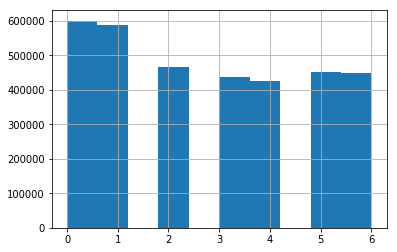

In [17]:
order['order_dow'].hist()

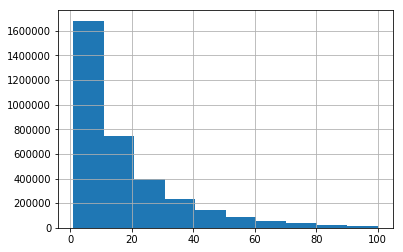

In [18]:
order['order_number'].hist()

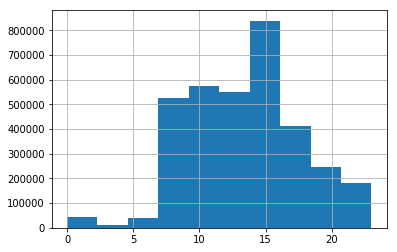

In [19]:
order['order_hour_of_day'].hist()

In [25]:
product=order_product_prior.groupby(['product_id'], as_index=False).mean().round(1)
product

,product_id,order_id,add_to_cart_order,reordered
0,1,1714065.4,5.8,0.6
1,2,1712431.3,9.9,0.1
2,3,1802959.0,6.4,0.7
3,4,1699142.0,9.5,0.4
4,5,1789275.5,6.5,0.6
5,6,1494141.9,14.1,0.4
6,7,1931702.5,8.0,0.4
7,8,1697655.0,8.4,0.5
8,9,1777873.4,7.6,0.5
9,10,1731604.9,8.8,0.5


In [31]:
order.corr()

#days_since_prior_order 와 order_number 가 약간의 상관관계가 있다.

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000165,-0.000098,0.000929,-0.000019,0.000523
user_id,-0.000165,1.000000,-0.001424,-0.001205,-0.001007,0.001591
order_number,-0.000098,-0.001424,1.000000,0.015258,-0.035690,-0.360563
order_dow,0.000929,-0.001205,0.015258,1.000000,0.005978,-0.028111
order_hour_of_day,-0.000019,-0.001007,-0.035690,0.005978,1.000000,0.001293
days_since_prior_order,0.000523,0.001591,-0.360563,-0.028111,0.001293,1.000000


In [32]:
#재주문이 없는 제품 one shot제품
a=order_product_prior.groupby(['product_id'], as_index=False).sum()
a[a['reordered']==0]



,product_id,order_id,add_to_cart_order,reordered
18,19,7971490,55,0
47,48,16578342,62,0
75,76,7575928,13,0
79,80,7497149,86,0
84,85,8004848,17,0
91,92,7438594,70,0
104,105,28866184,180,0
132,133,30213196,202,0
150,151,4456338,51,0
162,163,16791625,126,0


In [33]:
#사람들이 제일 처음 담는 제품

a=order_product_prior.groupby(['product_id'], as_index=False).mean()
a.sort_values(["add_to_cart_order"], ascending=[True])


,product_id,order_id,add_to_cart_order,reordered
43136,43144,1.770650e+06,1.000000,0.000000
11250,11254,1.245924e+06,1.000000,0.000000
33434,33440,2.526440e+06,1.000000,0.000000
44486,44495,3.004721e+06,1.000000,0.000000
34956,34962,2.797782e+06,1.000000,0.000000
41792,41800,3.068753e+06,1.000000,0.000000
25436,25441,2.496979e+06,1.000000,0.000000
41782,41790,2.465311e+06,1.000000,0.000000
27857,27863,1.557963e+06,1.000000,0.000000
25883,25888,2.172800e+04,1.000000,0.000000


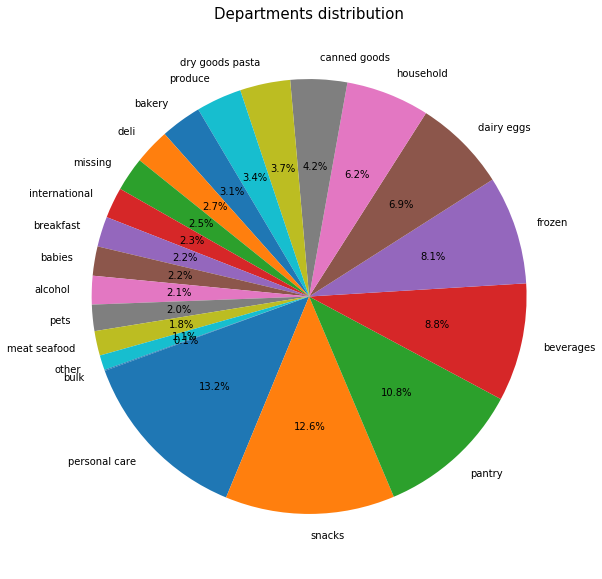

In [44]:
from collections import Counter
product_info  = pd.merge(product, department, how = "left", on="department_id")
product_info = pd.merge(product_info, aisle, how = "left", on="aisle_id")


plt.figure(figsize=(10,10))
temp_series = product_info['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels,
       autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

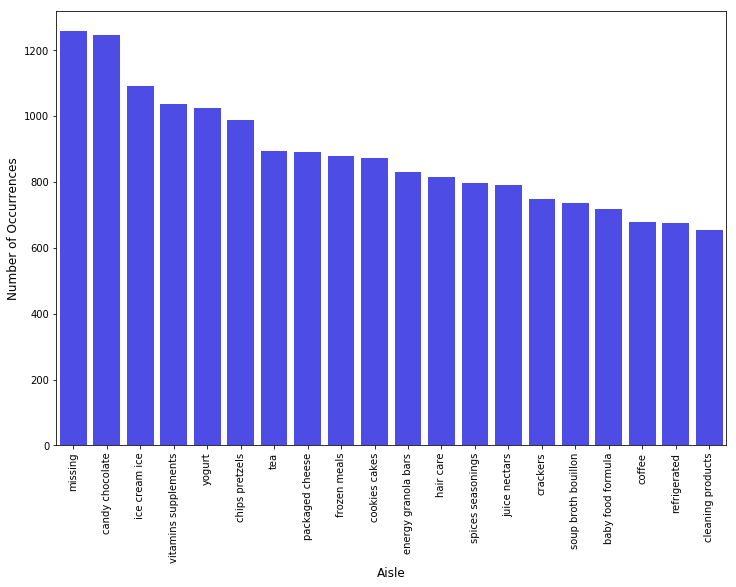

In [43]:
product_info  = pd.merge(product,department, how = "left", on="department_id")
product_info = pd.merge(product_info, aisle, how = "left", on="aisle_id")


cnt_srs = product_info['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color="b")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

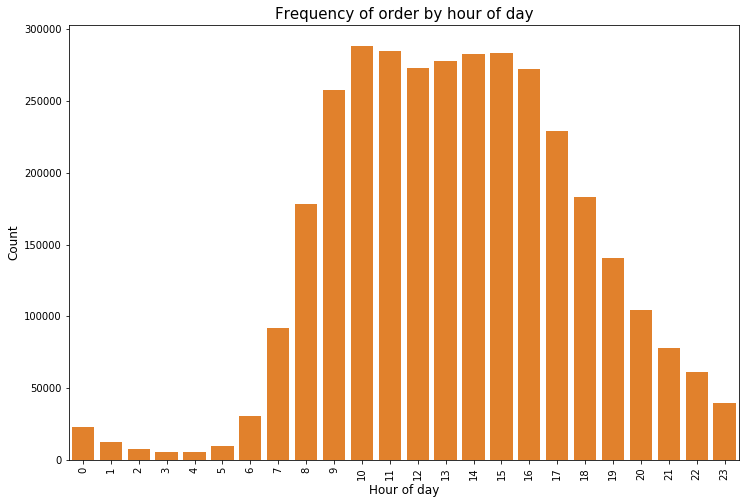

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=order, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()



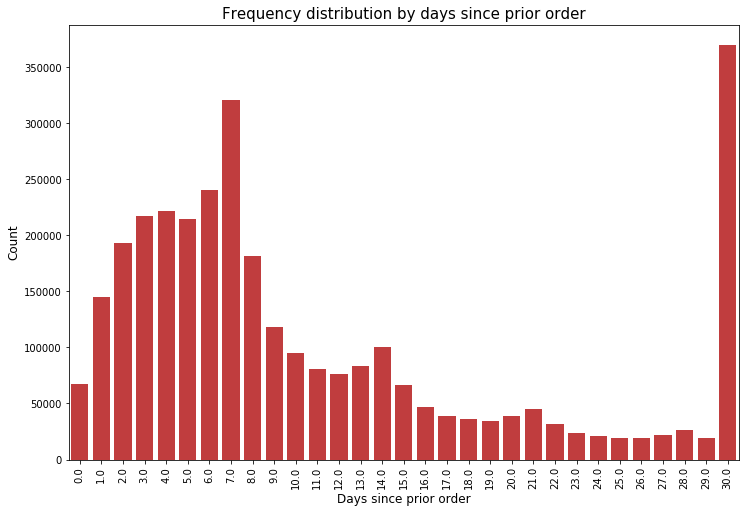

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=order, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()


In [140]:
_mt = pd.merge(order_product_all,product, on = ['product_id','product_id'])
_mt = pd.merge(_mt,order,on=['order_id','order_id'])
mta = pd.merge(_mt,aisle,on=['aisle_id','aisle_id'])

mta

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3.0,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2.0,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11.0,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21.0,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48.0,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15.0,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6.0,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11.0,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63.0,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16.0,1,13,3.0,eggs


In [23]:
#중분류에 따른 reorder 높은 순서 0.5이상
b=mta.groupby(['aisle'], as_index=False).mean()
b.drop(['order_id','product_id','aisle_id','department_id','user_id','order_number'],axis='columns', inplace=True)

b[b['reordered']>0.5].sort_values(["reordered"], ascending=[False])

,aisle,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order
83,milk,5.570370,0.781428,2.756353,13.316449,10.415861
131,water seltzer sparkling water,6.084061,0.729593,2.768633,13.287544,11.130590
50,fresh fruits,7.144228,0.718104,2.689367,13.383356,10.512936
41,eggs,6.430567,0.705366,2.735742,13.477934,11.510129
119,soy lactosefree,6.740299,0.692551,2.727005,13.390281,10.988736
96,packaged produce,5.123578,0.690734,2.778490,13.032975,12.017103
133,yogurt,7.861644,0.686489,2.692547,13.350207,10.858442
33,cream,6.803690,0.685046,2.800363,13.040971,10.634465
11,bread,7.515117,0.670168,2.729807,13.416959,11.069768
110,refrigerated,7.330554,0.663302,2.795522,13.453997,10.776777


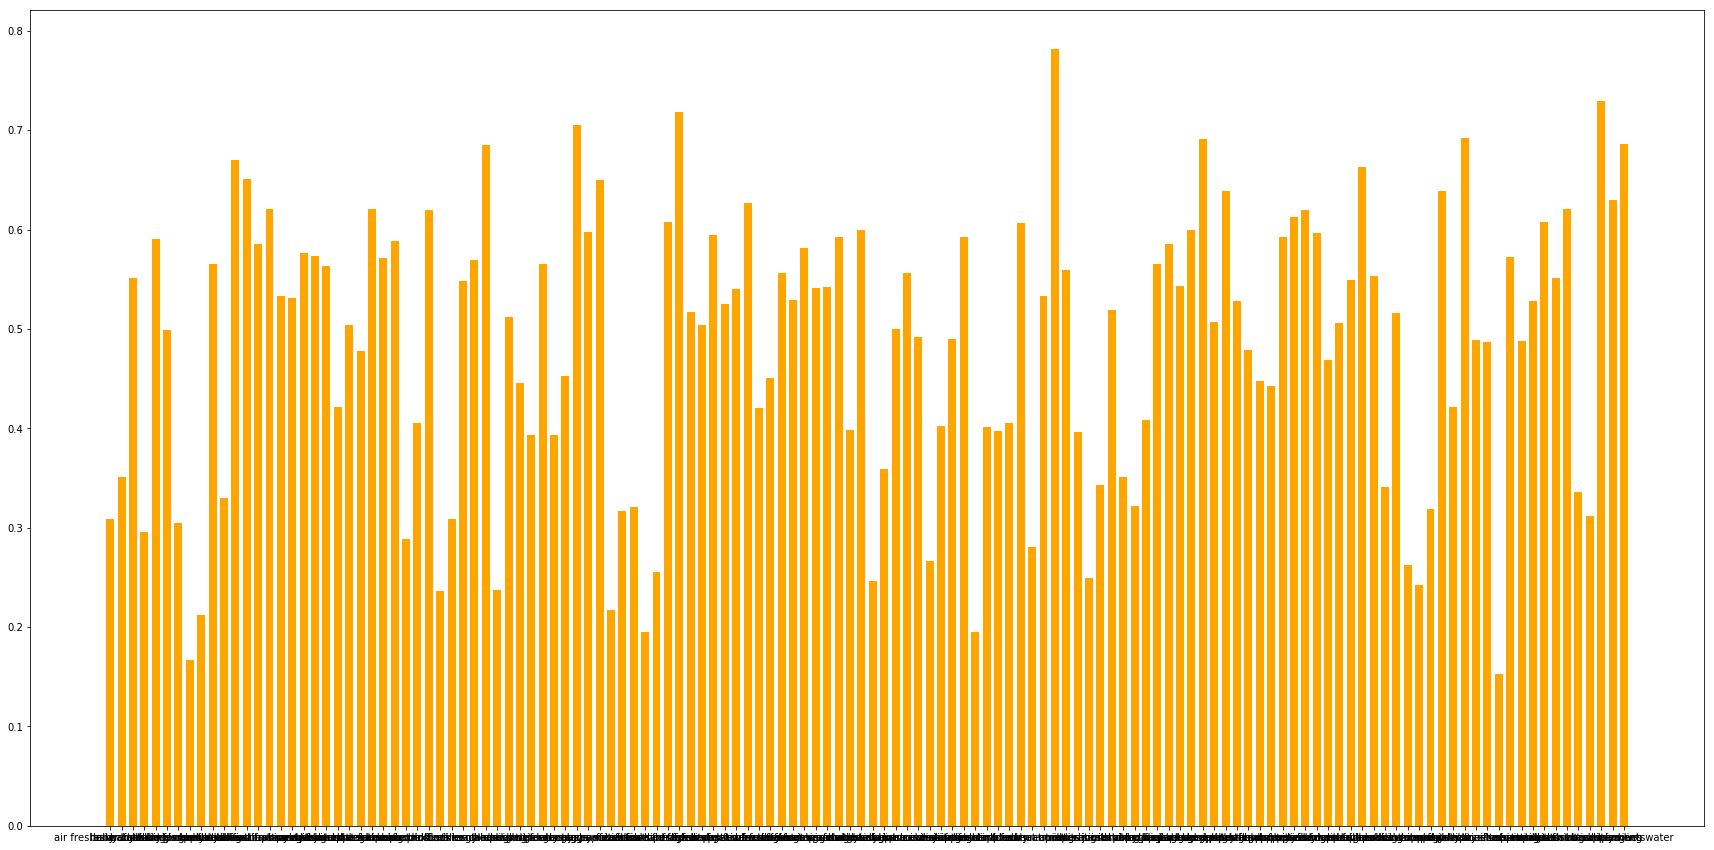

In [64]:
from random import *

plt.figure(figsize=(30,15)) 
y = b['reordered']
x = b['aisle']
plt.bar(x, y, width=0.7,color= 'orange')
plt.show()


In [27]:
# 중분류를 기준으로 구매주기가 낮은 순서(자주 구매) 
b.sort_values(["days_since_prior_order"], ascending=[True])

,aisle,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order
2,baby accessories,9.188971,0.550980,2.818505,13.330025,9.631953
123,spirits,4.852751,0.572344,3.244716,13.783930,9.880560
132,white wines,5.583710,0.630081,3.089698,13.704725,9.950695
4,baby food formula,10.762161,0.590259,2.699280,13.392612,9.967257
14,bulk dried fruits vegetables,7.853121,0.620394,2.766640,13.315753,9.968867
85,missing,9.339489,0.395849,2.800853,13.454841,10.218559
121,specialty wines champagnes,5.205930,0.486337,3.265137,13.652259,10.236157
15,bulk grains rice dried goods,8.950131,0.533275,2.751409,13.602674,10.241856
130,vitamins supplements,8.713465,0.311503,2.773386,13.299541,10.248973
18,candy chocolate,8.497802,0.573293,2.844727,13.471436,10.267194


In [145]:
_mt = pd.merge(order_product_all,product, on = ['product_id','product_id'])
_mt = pd.merge(_mt,order,on=['order_id','order_id'])
mtd = pd.merge(_mt,department,on=['department_id','department_id'])
mtd

MemoryError: 

In [144]:
mtd[mtd['eval_set']=='prior']

MemoryError: 

In [117]:
print(df_reg)

None


In [86]:
# 대분류를 기준으로 reorder가 높은 순서 
c=mtd.groupby(['department'], as_index=False).mean()
c.drop(['order_id','product_id','aisle_id','department_id','user_id'],axis='columns', inplace=True)
c.sort_values(["reordered"], ascending=[False])

,department,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
7,dairy eggs,7.495423,0.669969,17.663250,2.739444,13.367475,10.986296
3,beverages,6.976699,0.653460,17.225156,2.807151,13.313979,11.053354
19,produce,8.022875,0.649913,17.811403,2.683672,13.424949,10.856222
2,bakery,8.084397,0.628141,17.179756,2.743178,13.395367,11.095833
8,deli,8.693815,0.607719,16.473447,2.705505,13.481529,11.345652
18,pets,7.718544,0.601285,15.340520,2.934868,13.578394,11.867870
1,babies,10.575925,0.578971,19.310397,2.711004,13.397596,10.004465
5,bulk,8.399040,0.577040,20.197148,2.759061,13.458537,10.104230
20,snacks,9.187743,0.574180,17.177343,2.751490,13.360846,10.947866
0,alcohol,5.428346,0.569924,15.215751,3.163153,13.594264,10.340784


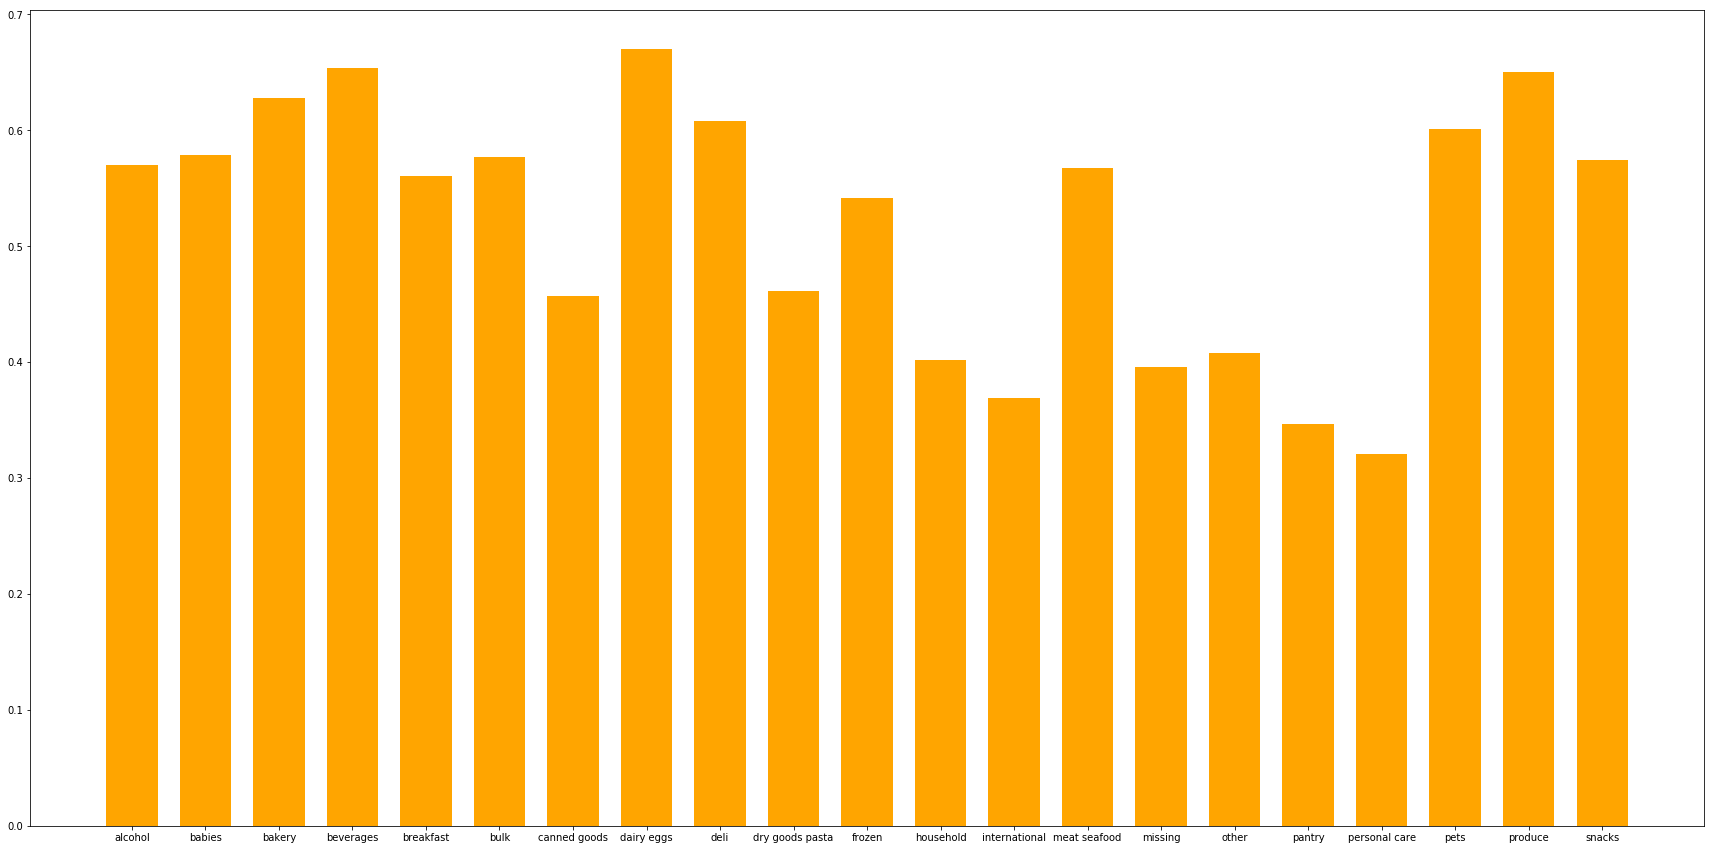

In [63]:
from random import *

plt.figure(figsize=(30,15)) 
y = c['reordered']
x = c['department']
plt.bar(x, y, width=0.7,color= 'orange')
plt.show()


In [36]:

import plotly.figure_factory as ff
import plotly.plotly as py
import plotly.graph_objs as go
plt.figure(figsize=(12,8))
data = [go.Bar(x=c.department,y=c.days_since_prior_order)]

plotly.offline.iplot(data, filename='reorder_bar')

<Figure size 864x576 with 0 Axes>

In [28]:
# 대분류를 기준으로 구매주기가 낮은 순서(자주 구매) 
c.sort_values(["days_since_prior_order"], ascending=[True])

,department,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order
1,babies,10.575925,0.578971,2.711004,13.397596,10.004465
5,bulk,8.399040,0.577040,2.759061,13.458537,10.104230
14,missing,9.339489,0.395849,2.800853,13.454841,10.218559
0,alcohol,5.428346,0.569924,3.163153,13.594264,10.340784
19,produce,8.022875,0.649913,2.683672,13.424949,10.856222
20,snacks,9.187743,0.574180,2.751490,13.360846,10.947866
15,other,8.277645,0.407980,2.851368,13.498939,10.952867
7,dairy eggs,7.495423,0.669969,2.739444,13.367475,10.986296
3,beverages,6.976699,0.653460,2.807151,13.313979,11.053354
2,bakery,8.084397,0.628141,2.743178,13.395367,11.095833


In [ ]:
d=mtd.groupby(['add_to_cart_order','department'], as_index=False).mean()
d.drop(['order_id','product_id','aisle_id','department_id','user_id','order_number'],axis='columns', inplace=True)
max(d[d['reordered']>0.5]



In [85]:

df = pd.DataFrame()
d=mtd.groupby(['add_to_cart_order','department'], as_index=False).mean()
d.drop(['order_id','product_id','aisle_id','department_id','user_id','order_number'],axis='columns', inplace=True)
d
# for i in range(1, 138):
#     print(d[max(d[d['add_to_cart_order'] == i].reordered)])
      

,add_to_cart_order,department,reordered,order_dow,order_hour_of_day,days_since_prior_order
0,1,alcohol,0.656844,3.205538,13.747920,9.719237
1,1,babies,0.625831,2.809432,13.545971,9.738681
2,1,bakery,0.694966,2.768565,13.437475,10.659952
3,1,beverages,0.750593,2.834586,13.328612,11.178675
4,1,breakfast,0.610283,2.776612,13.357555,11.038868
5,1,bulk,0.672158,2.755629,13.368753,9.644019
6,1,canned goods,0.493431,2.751158,13.518119,11.062845
7,1,dairy eggs,0.761635,2.762859,13.368636,10.675517
8,1,deli,0.686116,2.735778,13.575852,10.832793
9,1,dry goods pasta,0.474372,2.740753,13.671274,10.939058


In [56]:
mt['product_name'].value_counts()[0:10]

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

In [57]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: aisle, dtype: int64

In [59]:

from sklearn.decomposition import PCA
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)
ps = pd.DataFrame(pca_samples)


(206209, 2)
          4          1
0  0.269103   2.429427
1 -6.920940  36.751116
2 -0.442380   2.404383
3 -0.288227  -0.755823
4  0.612825  -2.637225


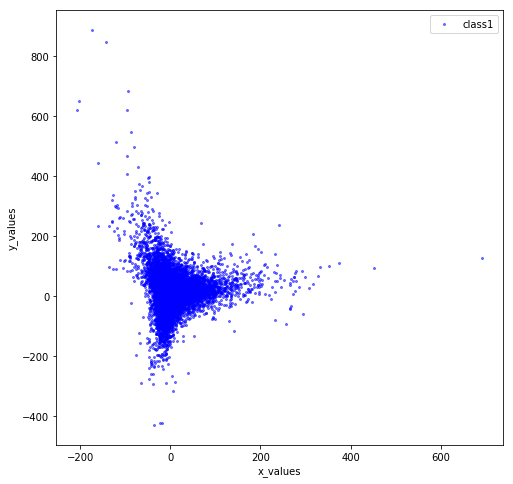

In [60]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.11868889   0.09644088]
 [-11.26759135  65.24816499]
 [ -4.7138808  -40.63421033]
 [ 76.82339286  26.26358547]]


['orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


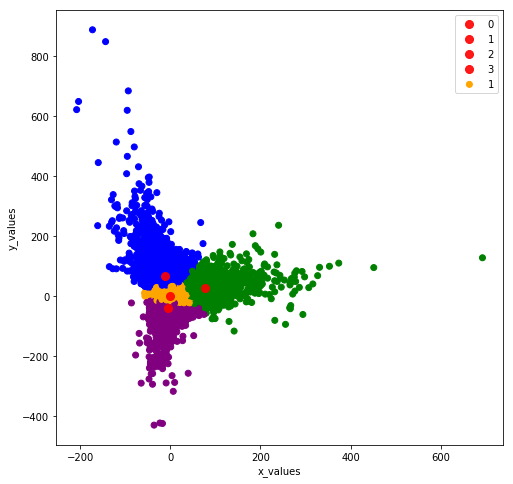

In [62]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

(206209, 135)


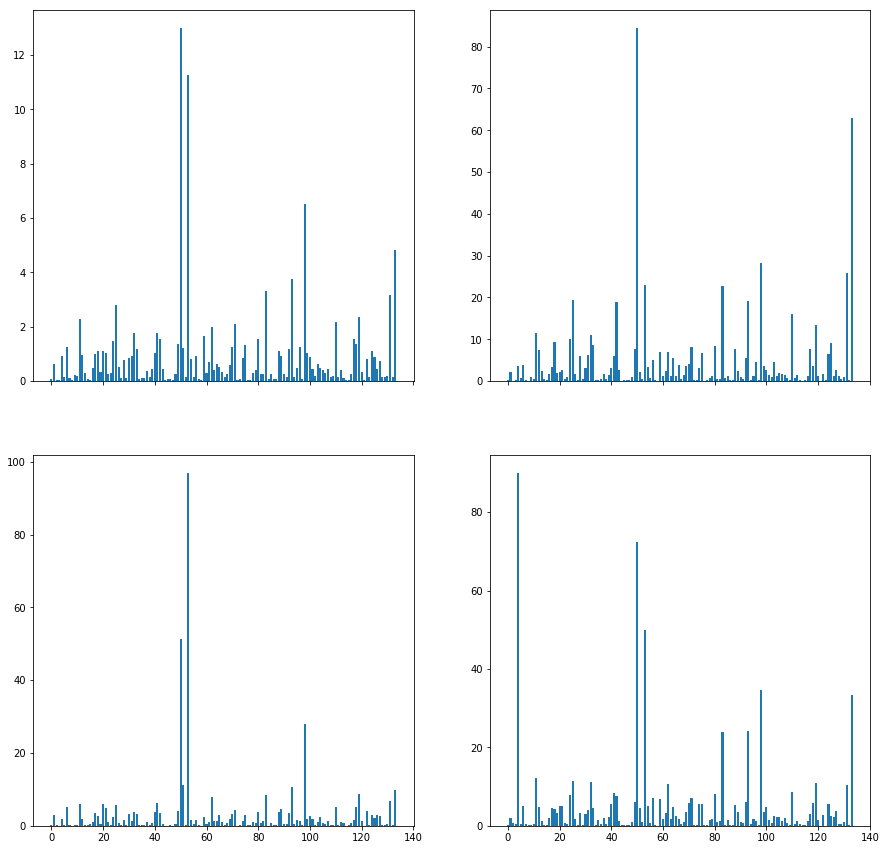

In [63]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [64]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     12.997293
fresh vegetables                 11.264617
packaged vegetables fruits        6.532016
yogurt                            4.838682
packaged cheese                   3.754675
milk                              3.303355
water seltzer sparkling water     3.168569
chips pretzels                    2.782964
soy lactosefree                   2.349505
bread                             2.279440
dtype: float64

In [65]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     84.445473
yogurt                           62.984685
packaged vegetables fruits       28.129081
water seltzer sparkling water    25.795860
fresh vegetables                 22.891787
milk                             22.726523
chips pretzels                   19.449680
packaged cheese                  19.042915
energy granola bars              19.022383
refrigerated                     16.012959
dtype: float64

In [66]:
c2.sort_values(ascending=False)[0:10]



aisle
fresh vegetables                 96.941836
fresh fruits                     51.419980
packaged vegetables fruits       27.925411
fresh herbs                      11.318104
packaged cheese                  10.646082
yogurt                            9.926398
soy lactosefree                   8.805224
milk                              8.353379
frozen produce                    7.815187
water seltzer sparkling water     6.770039
dtype: float64

In [67]:
c3.sort_values(ascending=False)[0:10]

aisle
baby food formula             90.031453
fresh fruits                  72.334056
fresh vegetables              50.059111
packaged vegetables fruits    34.557484
yogurt                        33.242950
packaged cheese               24.305315
milk                          23.996746
bread                         12.200651
chips pretzels                11.457701
crackers                      11.247831
dtype: float64

In [68]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,12.997293,11.264617,6.532016,4.838682,3.754675,3.303355,3.168569,2.782964
1,84.445473,22.891787,28.129081,62.984685,19.042915,22.726523,25.795860,19.449680
2,51.419980,96.941836,27.925411,9.926398,10.646082,8.353379,6.770039,5.795979
3,72.334056,50.059111,34.557484,33.242950,24.305315,23.996746,10.527657,11.457701
